In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0,'../mupClassification/')
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from matplotlib.pylab import *
import matplotlib.patches as patches
%matplotlib inline

OffBeam_scaling: 1.24224698773 = N(on beam)/N(off beam) before sof. trig.
MC_scaling_DATAcosmic: 0.504451038576 = N(POT on beam)/N(POT MC)
MC_scaling_MCcosmic: 0.136225100235 = N(POT on beam)/N(POT MC)


# 1.III The distribution of On-Off beam before any acceptance cuts
Sep-3, 2017

In [2]:
debug = 1
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/DistributionsBeforeCuts/'

In [3]:
Nevents

{'MC-BNB/Cosmic-DATA overlay': 96350,
 'MC-BNB/Cosmic-DATA overlay POT': 9.773e+19,
 'MC-BNB/Cosmic-MC overlay': 358800,
 'MC-BNB/Cosmic-MC overlay POT': 3.61901e+20,
 'OffBeam after sof.trig.': 380602,
 'OffBeam before sof.trig.': 8529852.084267145,
 'OffBeam sof.trig. efficiency': 0.04462,
 'OnBeam POT': 4.93e+19,
 'OnBeam after sof.trig.': 544114,
 'OnBeam before sof.trig.': 10596183.05744888,
 'OnBeam sof.trig. efficiency': 0.05135,
 'v04 after sof.trig.': 378787,
 'v05 after sof.trig.': 1815}

## (1) Off-Beam from two samples
the infamous "inconsistent process history" issue
separate the list into two lists 
corresponding to files that were swizzled using v04_26_04_% and v05_08_00_%

In [4]:
OffBeam = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v04_vertices.csv')
                     ,pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v05_vertices.csv')])
OffBeamFV = sample_in_FV(OffBeam)
print len(OffBeam),'pairs from Off-Beam'
print len(OffBeamFV),'pairs from Off-Beam in FV'

104447 pairs from Off-Beam
64134 pairs from Off-Beam in FV


## (2) On-Beam sample

In [5]:
OnBeam = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_bnb_v8_mcc8_vertices.csv')
OnBeamFV = sample_in_FV(OnBeam)
print len(OnBeam),'pairs from On-Beam'
print len(OnBeamFV),'pairs from On-Beam in FV'

162057 pairs from On-Beam
100379 pairs from On-Beam in FV


## (3) MC-BNB + Cosmic DATA/MC overlay 

In [6]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


In [7]:
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.33)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,4.1%,no cut,100.0% (3814),100.0% (4001),100.0% (22562),100.0% (1234)
PIDa,79.9%,45.6%,76.1%,14.0%,${PID}_a>12$,79.9% (3046),38.4% (1536),9.3% (2102),76.1% (939)
length,64.0%,59.4%,63.9%,19.2%,$l_{\mu}>l_{p}$,64.0% (2440),20.3% (812),3.8% (855),63.9% (789)
non-collinearity,58.5%,70.8%,61.4%,24.0%,"$|\theta_{1,2}-90^0|<60^0$",58.5% (2231),14.2% (570),1.6% (351),61.4% (758)
vertex activity,34.2%,78.3%,53.2%,39.4%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",34.2% (1306),5.9% (235),0.6% (127),53.2% (657)
delta phi,24.1%,87.7%,47.9%,56.3%,$|\Delta \phi - \pi|<40^0$,24.1% (921),2.1% (85),0.2% (44),47.9% (591)
theta_pq,17.5%,95.4%,39.4%,69.4%,$\theta_{pq}<25^0$,17.5% (668),0.8% (32),0.0% (0),39.4% (486)
soft Pt,20.2%,94.6%,42.9%,65.1%,$p_{t}<0.35$ GeV/c,20.2% (769),1.1% (43),0.0% (1),42.9% (529)
tight Pt,9.3%,95.7%,22.4%,74.9%,$p_{t}<0.15$ GeV/c,9.3% (354),0.4% (16),0.0% (0),22.4% (277)
PIDa-,83.3%,43.5%,79.4%,13.4%,${PID}_a>11$,83.3% (3178),41.5% (1660),10.9% (2469),79.4% (980)


# Plots

In [8]:
   
def OnBeam_minus_OffBeam_2d( OnBeamSample=OnBeamFV , OffBeamSample=OffBeamFV 
                            , varx='l_assigned_proton' , x_label='$l^{\\mu}$' 
                            , vary='l_assigned_muon' , y_label='$l^p$' 
                            , bins=(np.linspace(0,100,51),np.linspace(0,150,51))
                            , ax=None, figsize=(12,8),fontsize=25
                            , cmap='hot_r'):
    if ax is None: fig,ax=plt.subplots(figsize=figsize)
    h_OnBeam_T,xedges, yedges = np.histogram2d( OnBeamSample[varx] , OnBeamSample[vary] , bins=bins )
    h_OffBeam_T,xedges, yedges = np.histogram2d( OffBeamSample[varx] , OffBeamSample[vary] , bins=bins )
    
    h_OnBeam_minus_OffBeam_T = h_OnBeam_T - OffBeam_scaling*h_OffBeam_T
    h_OnBeam_minus_OffBeam = h_OnBeam_minus_OffBeam_T.T

    X, Y = np.meshgrid(xedges, yedges)
    pcmesh = ax.pcolormesh(X, Y, h_OnBeam_minus_OffBeam ,cmap=cmap)
    cbar = plt.colorbar(pcmesh,label='(On-Off) Beam [cts]')
    cbar.ax.yaxis.label.set_font_properties(matplotlib.font_manager.FontProperties(size=fontsize))
    cbar.ax.tick_params(labelsize=fontsize) 
    
    bin_width = [bins[0][1]-bins[0][0],bins[1][1]-bins[1][0]]    
    ax.set_xlim(np.min(bins[0])-bin_width[0],np.max(bins[0])+bin_width[0]);
    ax.set_ylim(np.min(bins[1])-bin_width[1],np.max(bins[1])+bin_width[1]);
    set_axes(ax,x_label=x_label,y_label=y_label,do_add_grid=True,fontsize=fontsize)

# lets get to buissiness

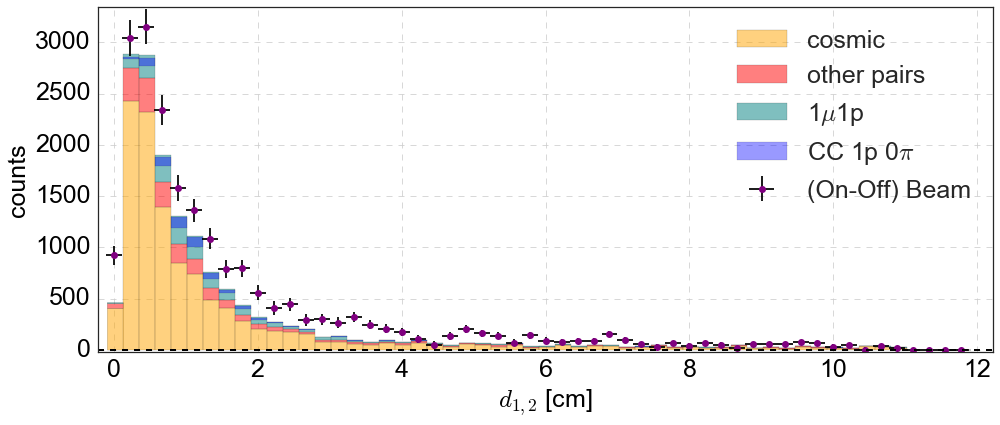

In [9]:
OnBeam_minus_OffBeam_1d(OnBeamSample=OnBeamFV , OffBeamSample=OffBeamFV ,var='distance' , x_label='$d_{1,2}$ [cm]', bins=np.linspace(0,12,55) , MCsamples=MCbnbDATAcosmicSamples , MCalpha=0.5)
plt.tight_layout()
plt.savefig(figures_path+'distance_no_cuts'+'.pdf')

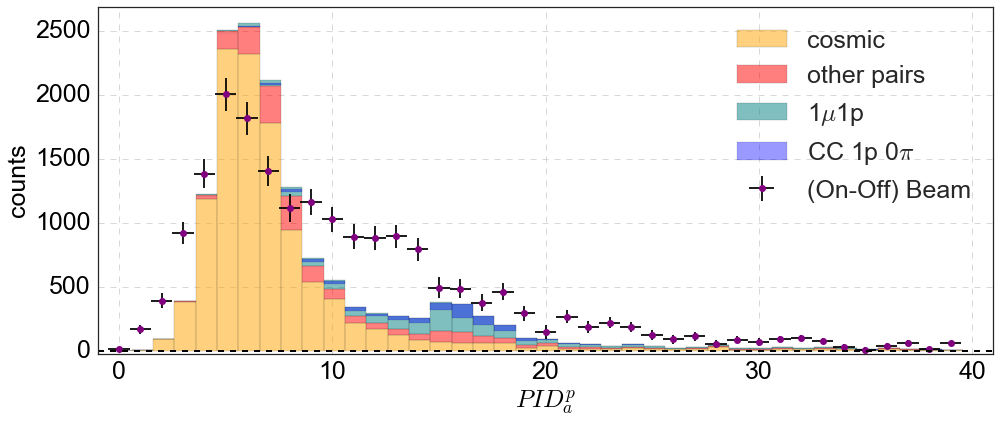

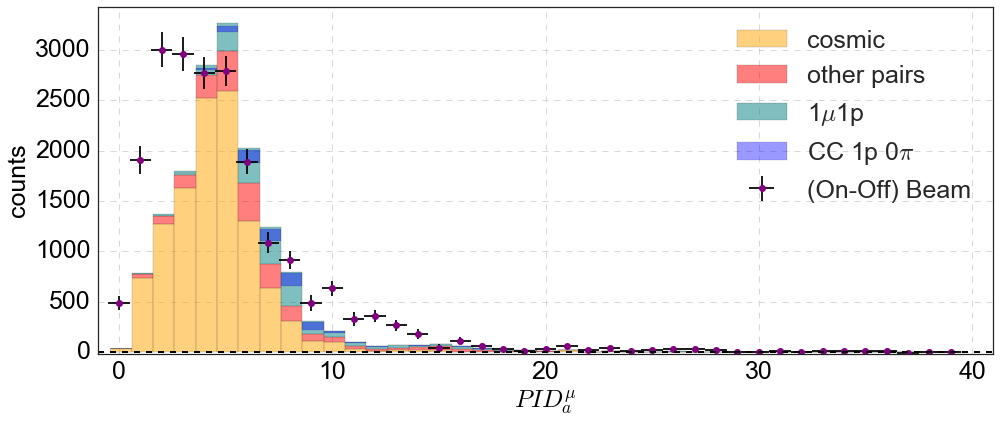

In [10]:
OnBeam_minus_OffBeam_1d(OnBeamSample=OnBeamFV , OffBeamSample=OffBeamFV ,var='PIDa_assigned_proton' , x_label='$PID_a^p$', bins=np.linspace(0,40,41) , MCsamples=MCbnbDATAcosmicSamples, MCalpha=0.5 )
plt.tight_layout()
plt.savefig(figures_path+'PIDa_p_no_cuts'+'.pdf')
OnBeam_minus_OffBeam_1d(OnBeamSample=OnBeamFV , OffBeamSample=OffBeamFV ,var='PIDa_assigned_muon' , x_label='$PID_a^{\\mu}$', bins=np.linspace(0,40,41) , MCsamples=MCbnbDATAcosmicSamples, MCalpha=0.5 )
plt.tight_layout()
plt.savefig(figures_path+'PIDa_mu_no_cuts'+'.pdf')

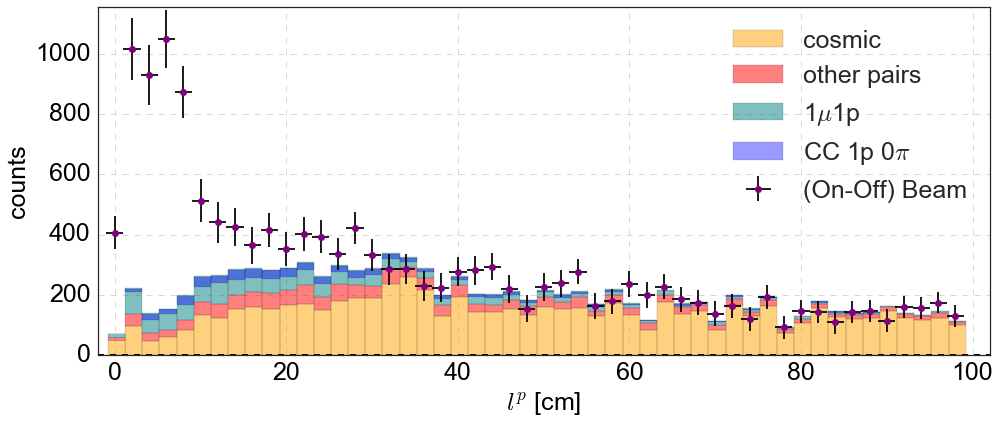

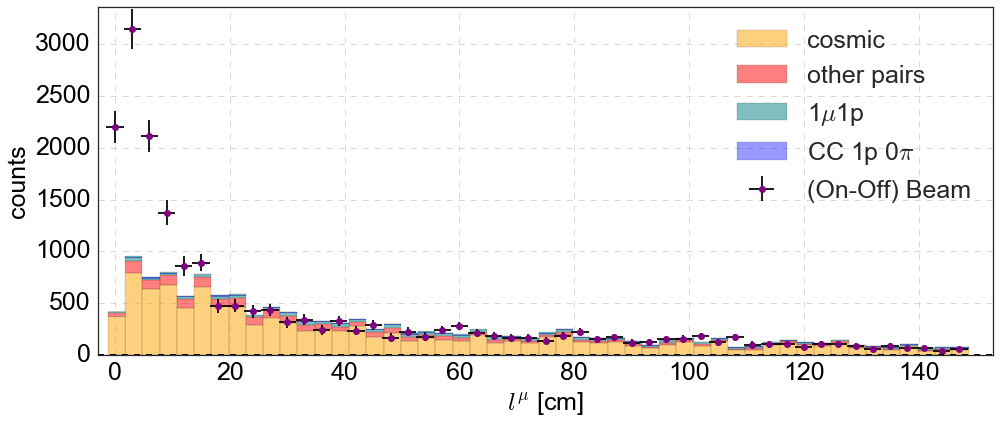

In [11]:
OnBeam_minus_OffBeam_1d(OnBeamSample=OnBeamFV , OffBeamSample=OffBeamFV ,var='l_assigned_proton' , x_label='$l^{p}$ [cm]', MCsamples=MCbnbDATAcosmicSamples, bins=np.linspace(0,100,51))
plt.tight_layout()
plt.savefig(figures_path+'l_p_no_cuts'+'.pdf')
OnBeam_minus_OffBeam_1d(OnBeamSample=OnBeamFV , OffBeamSample=OffBeamFV , var='l_assigned_muon' , x_label='$l^{\\mu}$ [cm]', MCsamples=MCbnbDATAcosmicSamples, bins=np.linspace(0,150,51))
plt.tight_layout()
plt.savefig(figures_path+'l_mu_no_cuts'+'.pdf')

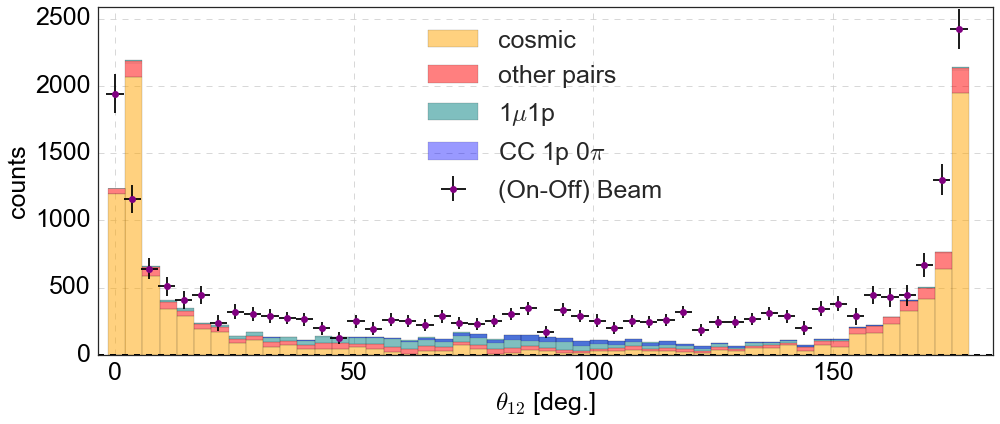

In [12]:
OnBeam_minus_OffBeam_1d(OnBeamSample=OnBeamFV , OffBeamSample=OffBeamFV ,var='theta_12' , x_label='$\\theta_{12}$ [deg.]', MCsamples=MCbnbDATAcosmicSamples, bins=np.linspace(0,180,51))
plt.tight_layout()
plt.savefig(figures_path+'theta_12_no_cuts'+'.pdf')

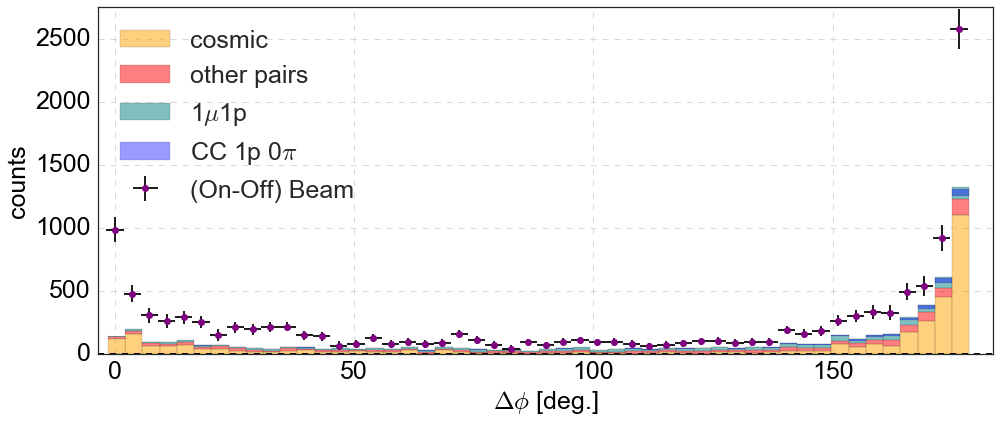

In [13]:
OnBeam_minus_OffBeam_1d(OnBeamSample=OnBeamFV , OffBeamSample=OffBeamFV ,var='delta_phi' , x_label='$\\Delta \\phi$ [deg.]',MCsamples=MCbnbDATAcosmicSamples,  bins=np.linspace(0,180,51))
plt.tight_layout()
plt.savefig(figures_path+'delta_phi_no_cuts'+'.pdf')

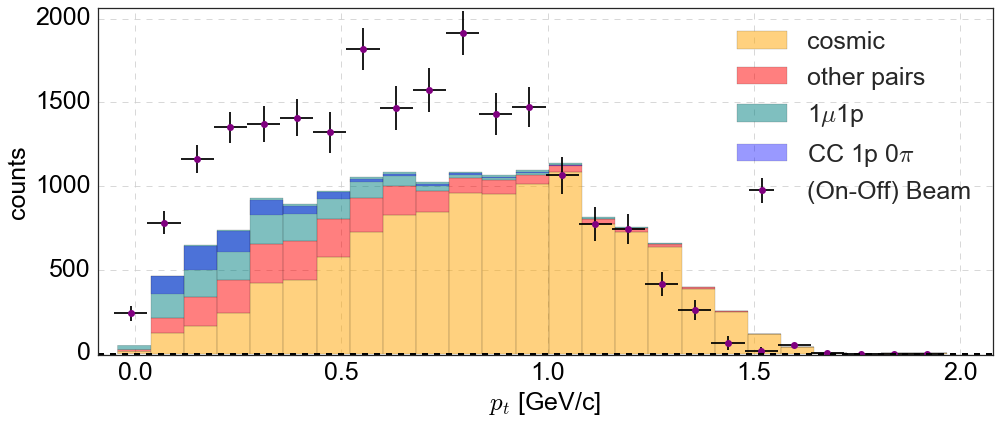

In [14]:
OnBeam_minus_OffBeam_1d(OnBeamSample=OnBeamFV , OffBeamSample=OffBeamFV ,var='reco_Pt' , x_label='$p_{t}$ [GeV/c]',MCsamples=MCbnbDATAcosmicSamples,  bins=np.linspace(-0.01,2,26))
plt.tight_layout()
plt.savefig(figures_path+'Pt_no_cuts'+'.pdf')

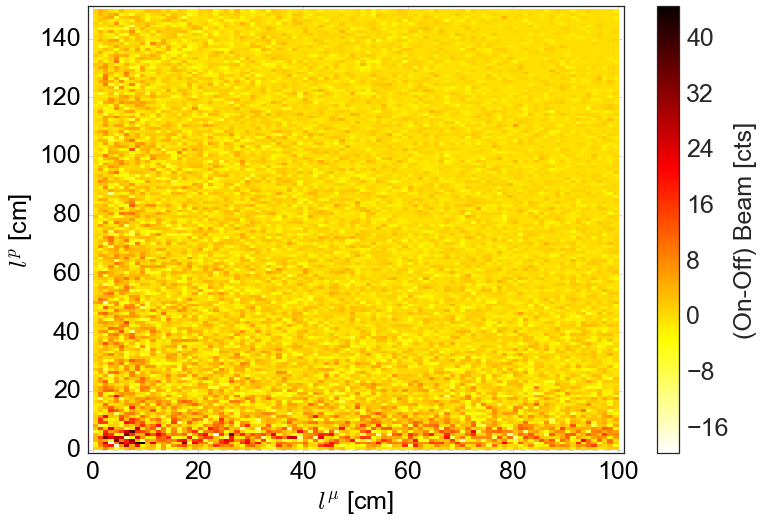

In [15]:
OnBeam_minus_OffBeam_2d( varx='l_assigned_proton' , x_label='$l^{\\mu}$ [cm]'                             
                        , vary='l_assigned_muon' , y_label='$l^p$ [cm]'
                        , bins=(np.linspace(0,100,101),np.linspace(0,150,151)))

TypeError: 'NoneType' object has no attribute '__getitem__'

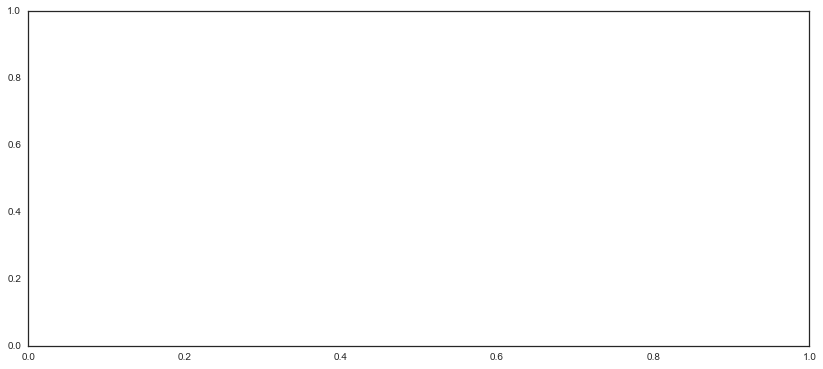

In [16]:
OnBeam_minus_OffBeam_1d(var='distance' , x_label='$d_{1,2}$ [cm]', bins=np.linspace(0,12,55) , MCsamples=MCbnbMCcosmicSamples, MC_scaling=MC_scaling_MCcosmic)

In [ ]:
OnBeam_minus_OffBeam_1d(var='PIDa_assigned_proton' , x_label='$PID_a^p$', bins=np.linspace(0,40,41) , MCsamples=MCbnbMCcosmicSamples,MC_scaling=MC_scaling_MCcosmic)
plt.tight_layout()
OnBeam_minus_OffBeam_1d(var='PIDa_assigned_muon' , x_label='$PID_a^{\\mu}$', bins=np.linspace(0,40,41) , MCsamples=MCbnbMCcosmicSamples,MC_scaling=MC_scaling_MCcosmic )
plt.tight_layout()

In [ ]:
OnBeam_minus_OffBeam_1d(var='l_assigned_proton' , x_label='$l^{p}$ [cm]', MCsamples=MCbnbMCcosmicSamples,MC_scaling=MC_scaling_MCcosmic, bins=np.linspace(0,100,51))
OnBeam_minus_OffBeam_1d(var='l_assigned_muon' , x_label='$l^{\\mu}$ [cm]', MCsamples=MCbnbMCcosmicSamples,MC_scaling=MC_scaling_MCcosmic, bins=np.linspace(0,150,51))

In [ ]:
OnBeam_minus_OffBeam_1d(var='theta_12' , x_label='$\\theta_{12}$ [deg.]', bins=np.linspace(0,180,51),MCsamples=MCbnbMCcosmicSamples,MC_scaling=MC_scaling_MCcosmic)

In [ ]:
OnBeam_minus_OffBeam_1d(var='delta_phi' , x_label='$\\Delta \\phi$ [deg.]', bins=np.linspace(0,180,51),MCsamples=MCbnbMCcosmicSamples,MC_scaling=MC_scaling_MCcosmic)

In [ ]:

Nevents['MC-BNB/Cosmic-MC overlay'] = 357600 # 358800 # from python scripts/count_events.py on <prodgenie_bnb_nu_cosmic_uboone_mcc8.2_reco2>
Nevents['MC-BNB/Cosmic-MC overlay POT'] = 3.60632e+20 # 3.61901e20
MC_scaling_MCcosmic = Nevents['OnBeam POT']/Nevents['MC-BNB/Cosmic-MC overlay POT']
print "MC_scaling_MCcosmic:",MC_scaling_MCcosmic,"= N(POT on beam)/N(POT MC)"

